In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('heart_data.csv')
df['BMI'] = df['weight']/((df['height']/100)*(df['height']/100))
df2 = df.drop(['index','id'],axis='columns')
df2['age']=(df2['age']/365).astype(int)
df2

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [2]:
age1 = pd.read_csv('age_25_40.csv')
age2 = pd.read_csv('age_41_55.csv')
age3 = pd.read_csv('age_55+.csv')

age1 = age1.drop(['Unnamed: 0','height', 'weight','BMI_category'],axis=1)

age2 = age2.drop(['Unnamed: 0', 'height', 'weight','BMI_category'],axis=1)

age3 = age3.drop(['Unnamed: 0', 'height', 'weight','BMI_category'],axis=1)
age3.columns

Index(['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'BMI'],
      dtype='object')

C:\Users\varad\AppData\Local\Temp\ipykernel_19960\2979150613.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio_1['gender'] = df_cardio_1['gender'].map(gender_labels)


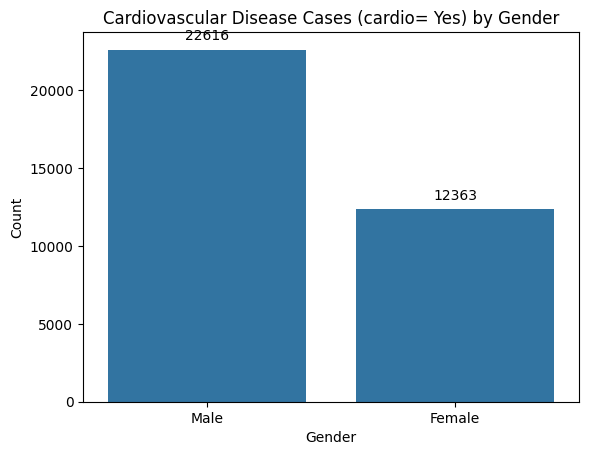

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrame to include only rows where cardio is equal to 1
df_cardio_1 = df2[df2['cardio'] == 1]

# Map gender values to corresponding labels
gender_labels = {1: 'Male', 2: 'Female'}
df_cardio_1['gender'] = df_cardio_1['gender'].map(gender_labels)

# Create a count plot
ax = sns.countplot(x='gender', data=df_cardio_1)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Cardiovascular Disease Cases (cardio= Yes) by Gender')

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Show plot
plt.show()





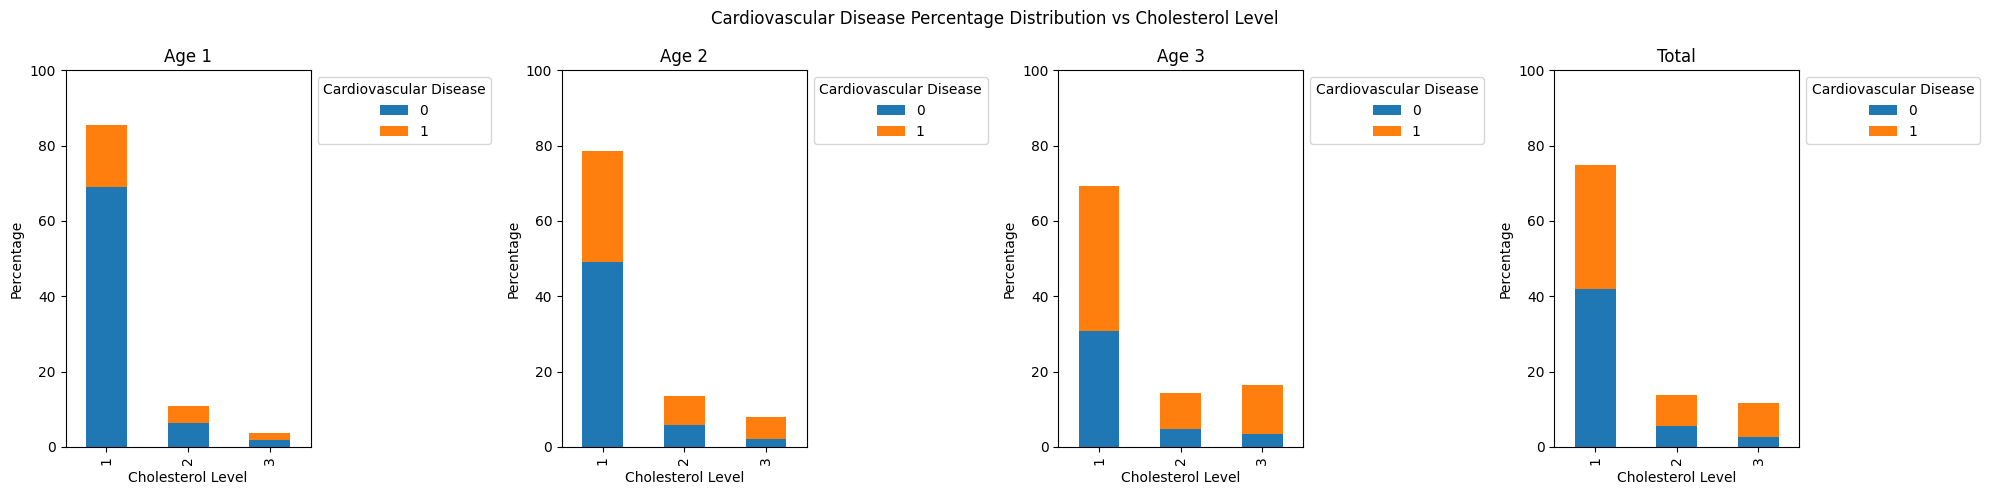

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot percentage-wise distribution for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    
    # Calculate percentage distribution
    total_samples = len(data)
    percentages = data.groupby(['cholesterol', 'cardio']).size().div(total_samples).mul(100).unstack()
    
    # Plot percentage-wise distribution
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels and title
    ax.set_xlabel('Cholesterol Level')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)  # Set y-axis limit to 100 for percentage
    
    # Add legend outside the plot
    ax.legend(title='Cardiovascular Disease', loc='upper left', bbox_to_anchor=(1, 1))

# Set super title
plt.suptitle('Cardiovascular Disease Percentage Distribution vs Cholesterol Level')

# Adjust layout and display plot
plt.tight_layout()
plt.show()




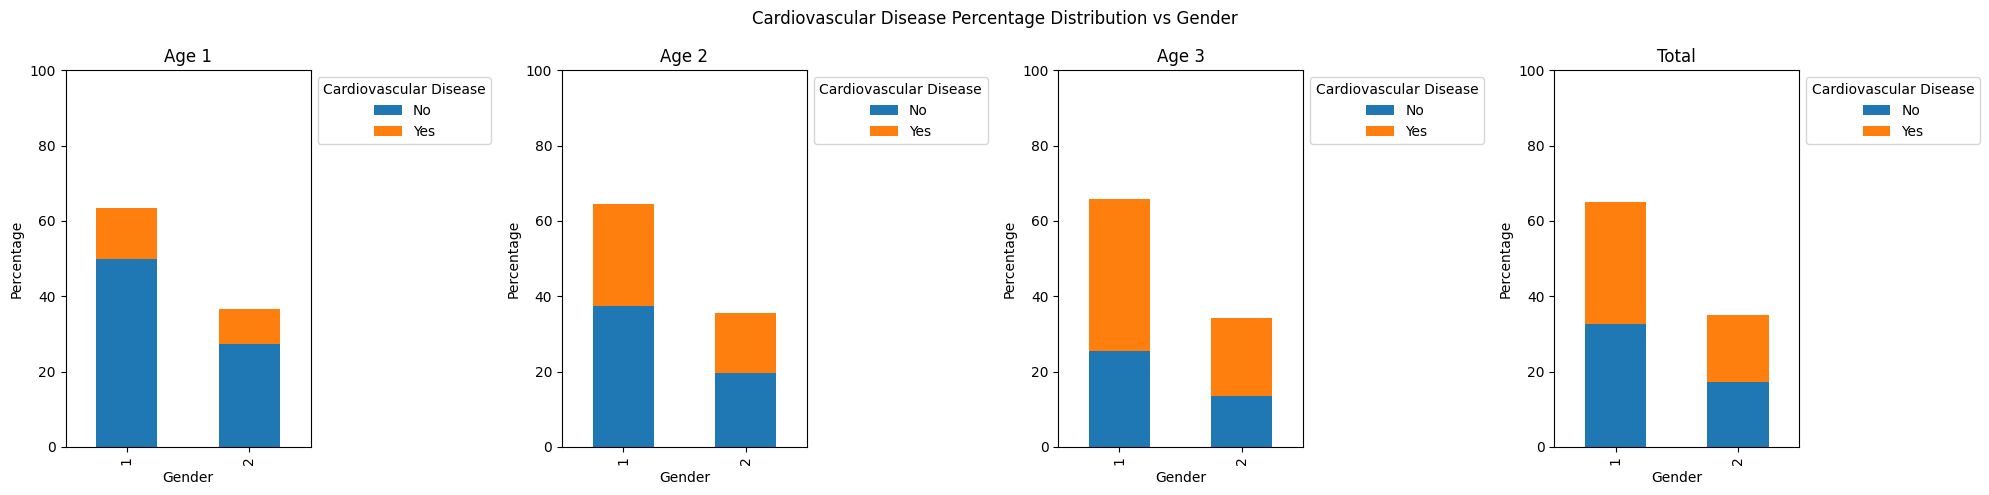

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot percentage-wise distribution for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    
    # Calculate percentage distribution
    total_samples = len(data)
    percentages = data.groupby(['gender', 'cardio']).size().div(total_samples).mul(100).unstack()
    
    # Plot percentage-wise distribution
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels and title
    ax.set_xlabel('Gender')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)  # Set y-axis limit to 100 for percentage
    
    # Add legend outside the plot
    ax.legend(['No', 'Yes'], title='Cardiovascular Disease', loc='upper left', bbox_to_anchor=(1, 1))

# Set super title
plt.suptitle('Cardiovascular Disease Percentage Distribution vs Gender')

# Adjust layout and display plot
plt.tight_layout()
plt.show()




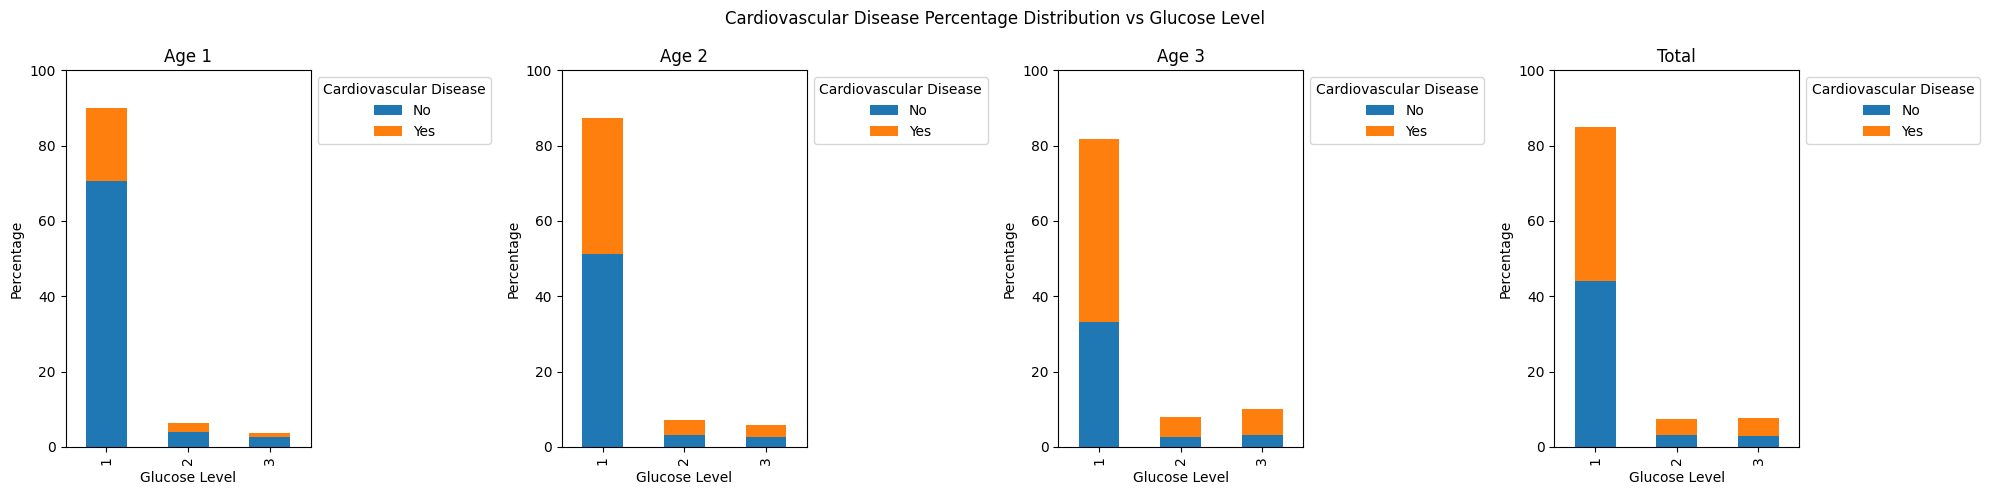

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot percentage-wise distribution for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    
    # Calculate percentage distribution
    total_samples = len(data)
    percentages = data.groupby(['gluc', 'cardio']).size().div(total_samples).mul(100).unstack()
    
    # Plot percentage-wise distribution
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels and title
    ax.set_xlabel('Glucose Level')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)  # Set y-axis limit to 100 for percentage
    
    # Add legend outside the plot
    ax.legend(['No', 'Yes'], title='Cardiovascular Disease', loc='upper left', bbox_to_anchor=(1, 1))

# Set super title
plt.suptitle('Cardiovascular Disease Percentage Distribution vs Glucose Level')

# Adjust layout and display plot
plt.tight_layout()
plt.show()




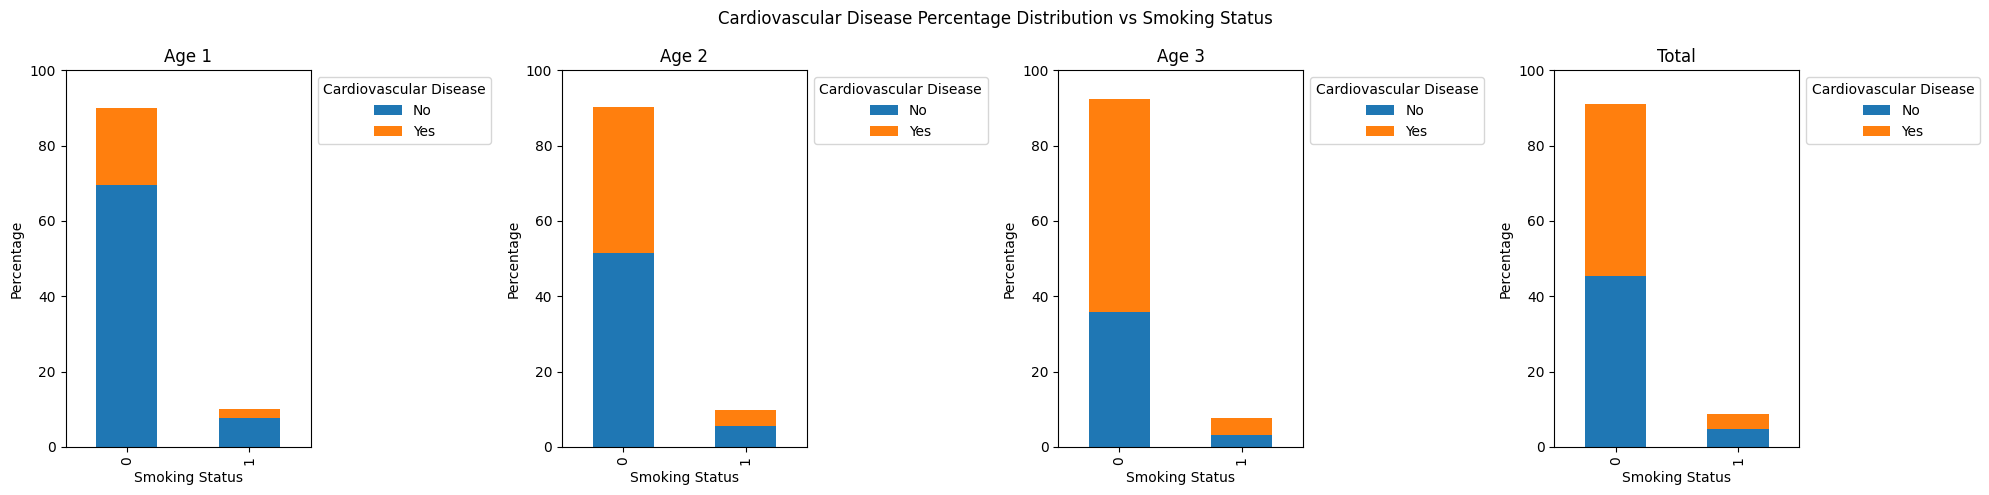

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot percentage-wise distribution for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    
    # Calculate percentage distribution
    total_samples = len(data)
    percentages = data.groupby(['smoke', 'cardio']).size().div(total_samples).mul(100).unstack()
    
    # Plot percentage-wise distribution
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels and title
    ax.set_xlabel('Smoking Status')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)  # Set y-axis limit to 100 for percentage
    
    # Add legend outside the plot
    ax.legend(['No', 'Yes'], title='Cardiovascular Disease', loc='upper left', bbox_to_anchor=(1, 1))

# Set super title
plt.suptitle('Cardiovascular Disease Percentage Distribution vs Smoking Status')

# Adjust layout and display plot
plt.tight_layout()
plt.show()




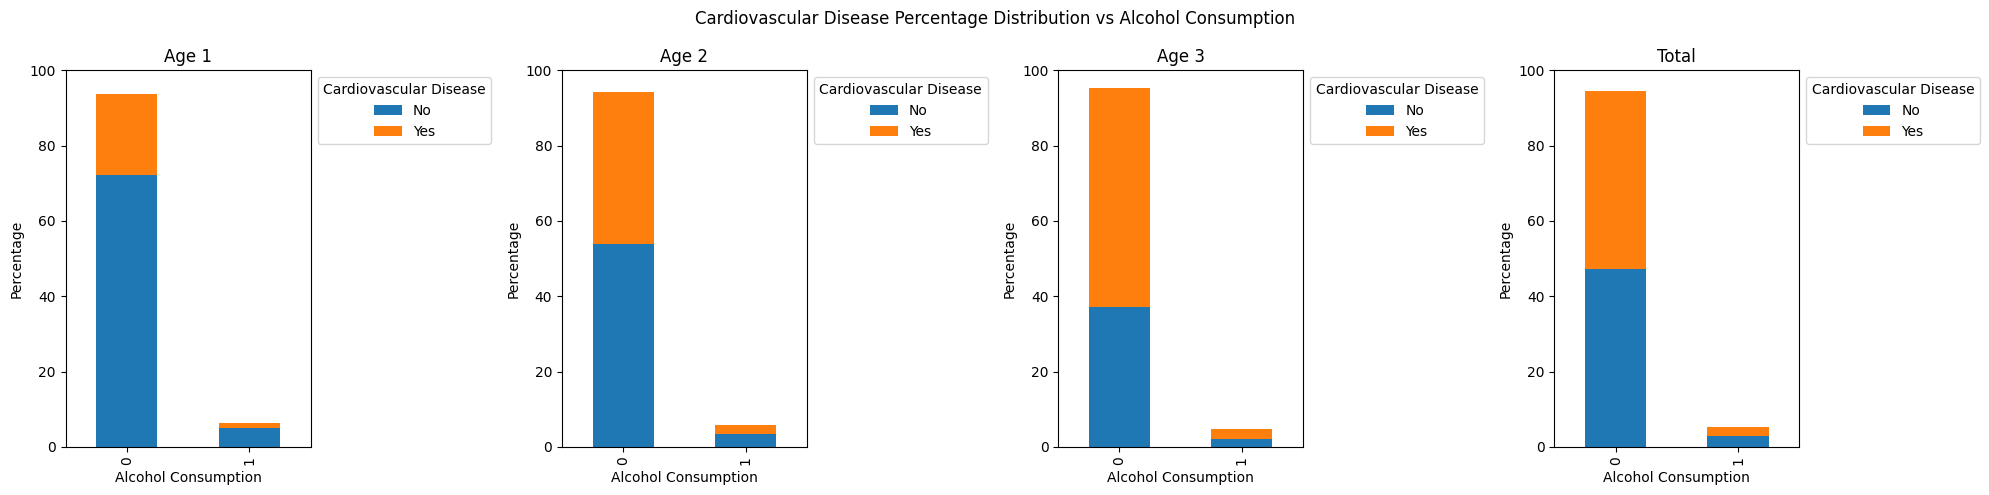

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot percentage-wise distribution for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    
    # Calculate percentage distribution
    total_samples = len(data)
    percentages = data.groupby(['alco', 'cardio']).size().div(total_samples).mul(100).unstack()
    
    # Plot percentage-wise distribution with two bars for 'Yes' and 'No' values of cardiovascular disease
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels and title
    ax.set_xlabel('Alcohol Consumption')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)  # Set y-axis limit to 100 for percentage
    
    # Add legend outside the plot
    ax.legend(['No', 'Yes'], title='Cardiovascular Disease', loc='upper left', bbox_to_anchor=(1, 1))

# Set super title
plt.suptitle('Cardiovascular Disease Percentage Distribution vs Alcohol Consumption')

# Adjust layout and display plot
plt.tight_layout()
plt.show()




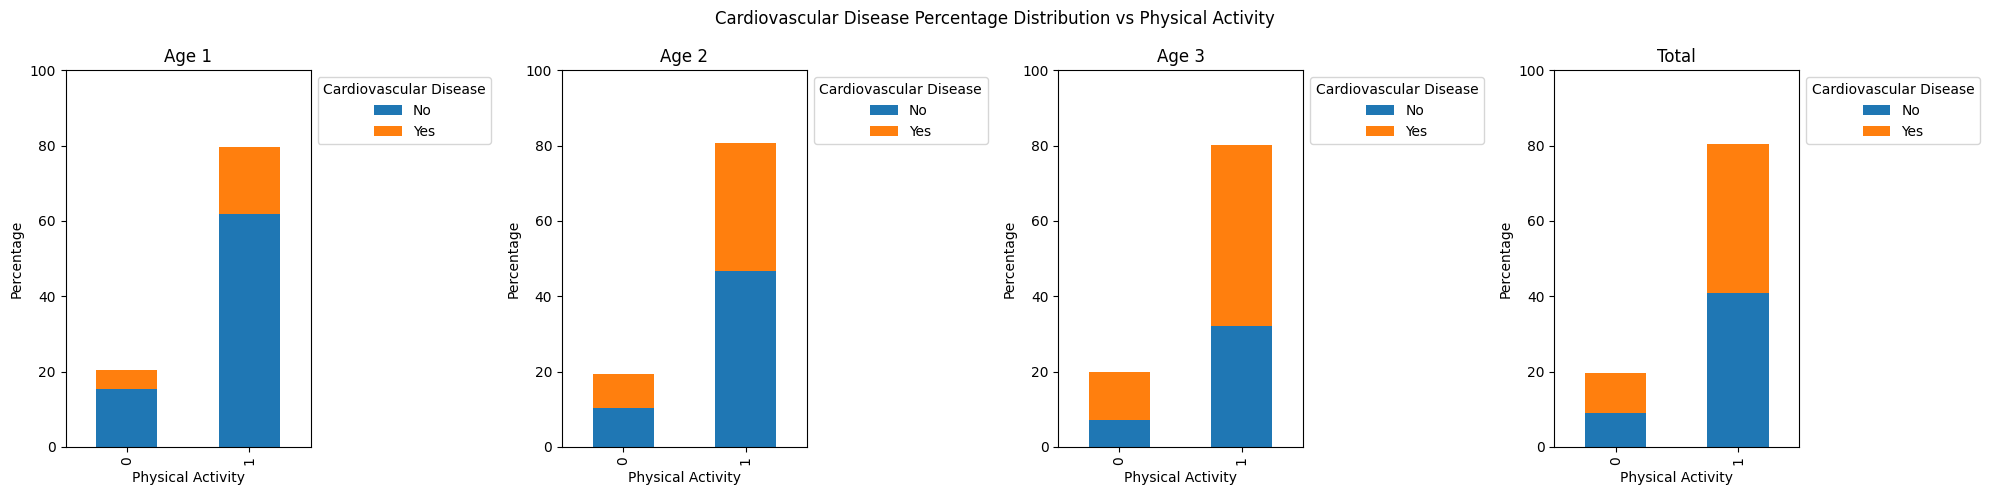

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot percentage-wise distribution for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    
    # Calculate percentage distribution
    total_samples = len(data)
    percentages = data.groupby(['active', 'cardio']).size().div(total_samples).mul(100).unstack()
    
    # Plot percentage-wise distribution with two bars for 'Yes' and 'No' values of cardiovascular disease
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels and title
    ax.set_xlabel('Physical Activity')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)  # Set y-axis limit to 100 for percentage
    
    # Add legend outside the plot
    ax.legend(['No', 'Yes'], title='Cardiovascular Disease', loc='upper left', bbox_to_anchor=(1, 1))

# Set super title
plt.suptitle('Cardiovascular Disease Percentage Distribution vs Physical Activity')

# Adjust layout and display plot
plt.tight_layout()
plt.show()




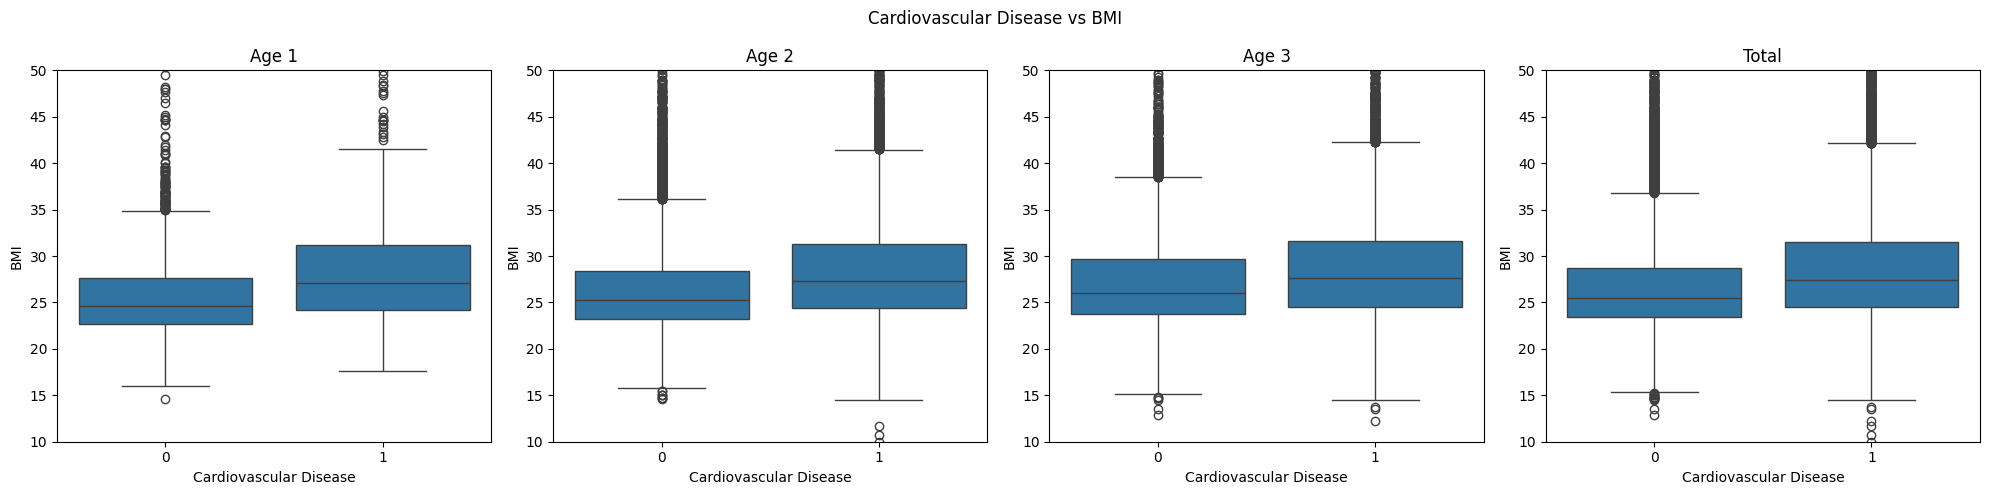

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot boxplots for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    sns.boxplot(x='cardio', y='BMI', data=data, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels
    ax.set_xlabel('Cardiovascular Disease')
    ax.set_ylabel('BMI')

    # Set y-axis limits to 0-40 for all subplots
    ax.set_ylim(10, 50)

plt.suptitle('Cardiovascular Disease vs BMI')
plt.tight_layout()
plt.show()


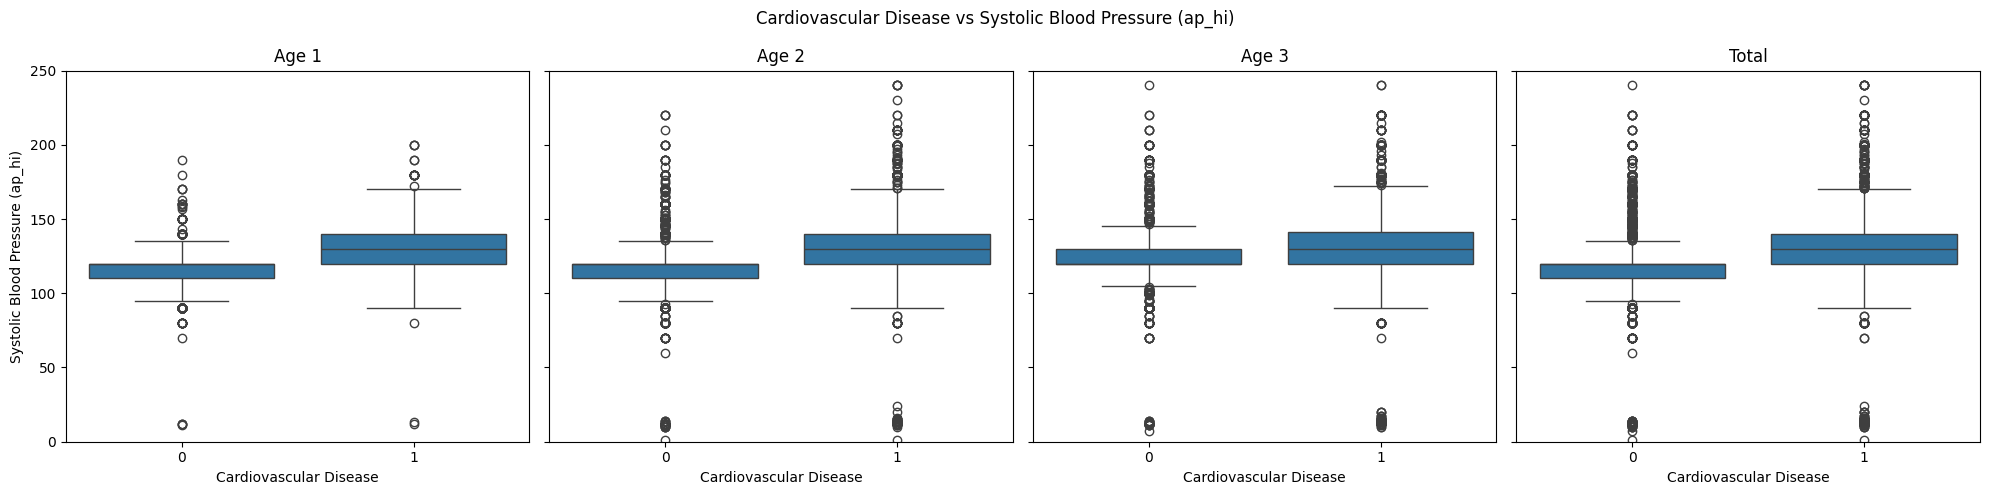

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns, sharing y-axis
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot boxplots for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    sns.boxplot(x='cardio', y='ap_hi', data=data, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels
    ax.set_xlabel('Cardiovascular Disease')
    ax.set_ylabel('Systolic Blood Pressure (ap_hi)')
    
    # Set y-axis limits
    ax.set_ylim(0, 250)

plt.suptitle('Cardiovascular Disease vs Systolic Blood Pressure (ap_hi)')
plt.tight_layout()
plt.show()



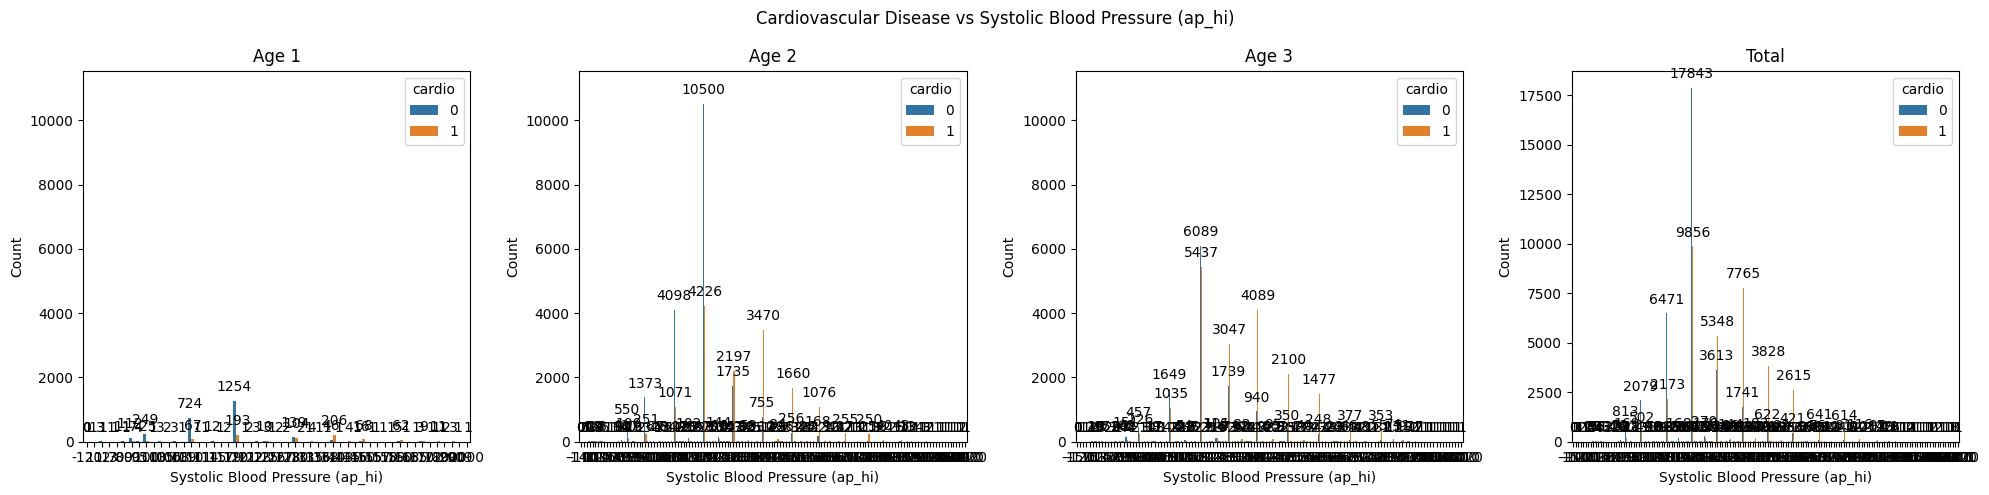

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of datasets
datasets = [age1, age2, age3, df2]

# Initialize max_count for age1, age2, and age3
max_counts = []

# Plot count plots for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    sns.countplot(x='ap_hi', hue='cardio', data=data, ax=ax)  # Replace 'active' with 'ap_hi'
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Add count numbers on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    # Set common labels and title
    ax.set_xlabel('Systolic Blood Pressure (ap_hi)')
    ax.set_ylabel('Count')

    # Get the maximum count for age1, age2, and age3
    if i < 3:
        max_counts.append(max([p.get_height() for p in ax.patches]))

# Set the same y-axis limits for age1, age2, and age3
max_count_age1_age2_age3 = max(max_counts)
for i in range(3):
    axes[i].set_ylim(0, max_count_age1_age2_age3 * 1.1)  # Adjust multiplier as needed

plt.suptitle('Cardiovascular Disease vs Systolic Blood Pressure (ap_hi)')
plt.tight_layout()
plt.show()





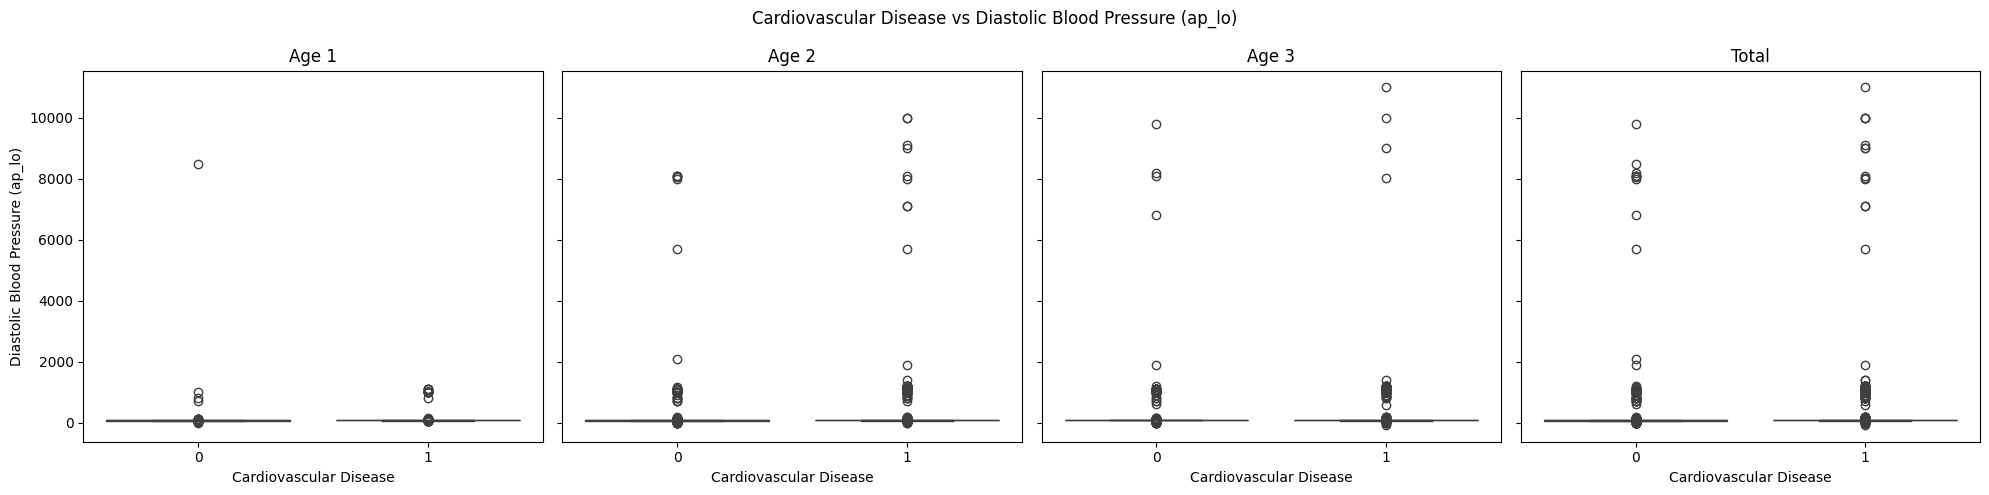

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 4 columns, sharing y-axis
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# List of datasets
datasets = [age1, age2, age3, df2]

# Plot boxplots for each dataset
for i, data in enumerate(datasets):
    ax = axes[i]
    sns.boxplot(x='cardio', y='ap_lo', data=data, ax=ax)
    
    if i == 3:
        ax.set_title('Total')
    else:
        ax.set_title(f'Age {i+1}')

    # Set common labels
    ax.set_xlabel('Cardiovascular Disease')
    ax.set_ylabel('Diastolic Blood Pressure (ap_lo)')

plt.suptitle('Cardiovascular Disease vs Diastolic Blood Pressure (ap_lo)')
plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features and target
X = df2.drop(columns=['cardio'])  # All columns except 'cardio' are considered independent variables
y = df2['cardio']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = model.predict(X_train)

# Making predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculating accuracy for training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 0.7166071428571429
Testing Accuracy: 0.7227142857142858


c:\Users\varad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


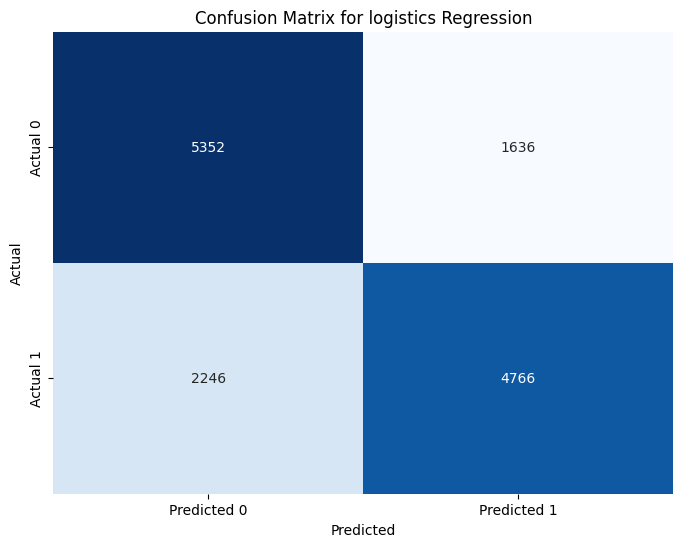

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained and evaluated your logistic regression model

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for logistics Regression')
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Grid search cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with best parameters
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy (after tuning):", accuracy_test)



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Testing Accuracy (after tuning): 0.7287857142857143


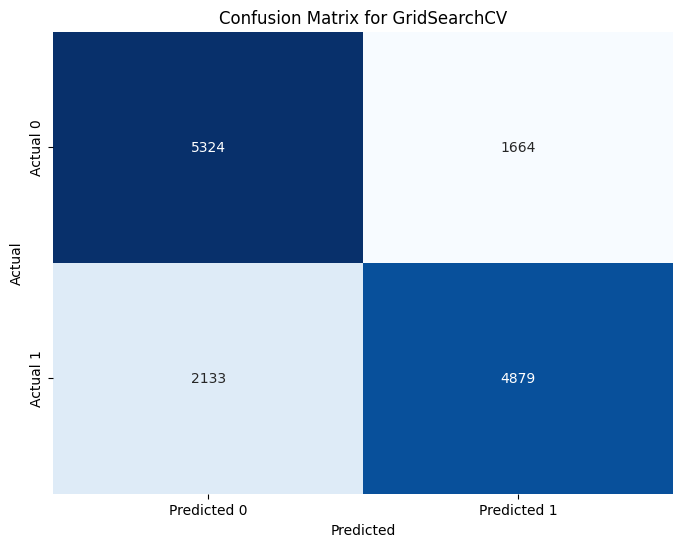

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already obtained the best model and made predictions on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GridSearchCV')
plt.show()


In [26]:
from sklearn.metrics import accuracy_score

# Evaluate the model with best parameters on training set
y_train_pred = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy (after tuning):", accuracy_train)


Training Accuracy (after tuning): 0.7542448979591837


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have loaded your data into a DataFrame called df

# Define features and target
X = df.drop(columns=['cardio'])
y = df['cardio']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = model.predict(X_train)

# Making predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculating accuracy for training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)


Training Accuracy: 0.9999795918367347
Testing Accuracy: 0.7272380952380952


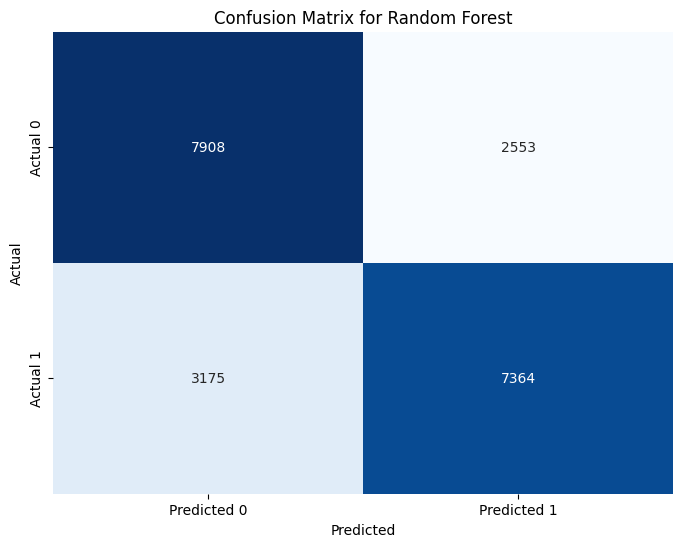

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained and evaluated your logistic regression model

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()